In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('../data/processed/Dronninglund_treated_data_and_flow_rates.csv', index_col=0, parse_dates=True)
water_sensors = ['T_{:04.1f}'.format(height) for height in np.linspace(16, 0.5, 32)]
df_water_sensors = df[water_sensors[::-1]]
df_water_sensors.columns = [float(c[2:]) for c in water_sensors[::-1]]
water_sensors = df_water_sensors['2017':'2020']
water_sensors_ = water_sensors.resample('h').mean()
water_sensors = water_sensors_.iloc[19500:26000]
water_sensors_train = water_sensors_.iloc[3000:7500]

data = pd.read_csv('../data/processed/data2.csv', index_col=0, parse_dates=True)
D = data.iloc[19500:26000]

p1 = pd.read_csv('../predictions/results/p_1step.csv', index_col=0)
sd1 =  pd.read_csv('../predictions/results/sd_obs_1step.csv', index_col=0)
sd1_state =  pd.read_csv('../predictions/results/sd_state_1step.csv', index_col=0)


p1d = pd.read_csv('../predictions/results/p_1d.csv', index_col=0)
sd1d =  pd.read_csv('../predictions/results/sd_obs_1d.csv', index_col=0)
sd1d_state =  pd.read_csv('../predictions/results/sd_state_1d.csv', index_col=0)


p2d = pd.read_csv('../predictions/results/p_2d.csv', index_col=0)
sd2d =  pd.read_csv('../predictions/results/sd_obs_2d.csv', index_col=0)
sd2d_state =  pd.read_csv('../predictions/results/sd_state_2d.csv', index_col=0)


p3d = pd.read_csv('../predictions/results/p_3d.csv', index_col=0)
sd3d =  pd.read_csv('../predictions/results/sd_obs_3d.csv', index_col=0)
sd3d_state =  pd.read_csv('../predictions/results/sd_state_3d.csv', index_col=0)


p4d = pd.read_csv('../predictions/results/p_4d.csv', index_col=0)
sd4d =  pd.read_csv('../predictions/results/sd_obs_4d.csv', index_col=0)
sd4d_state =  pd.read_csv('../predictions/results/sd_state_4d.csv', index_col=0)


p1w = pd.read_csv('../predictions/results/p_1w.csv', index_col=0)
sd1w =  pd.read_csv('../predictions/results/sd_obs_1w.csv', index_col=0)
sd1w_state =  pd.read_csv('../predictions/results/sd_state_1w.csv', index_col=0)

p2w = pd.read_csv('../predictions/results/p_2w.csv', index_col=0)
sd2w =  pd.read_csv('../predictions/results/sd_obs_2w.csv', index_col=0)
sd2w_state =  pd.read_csv('../predictions/results/sd_state_2w.csv', index_col=0)



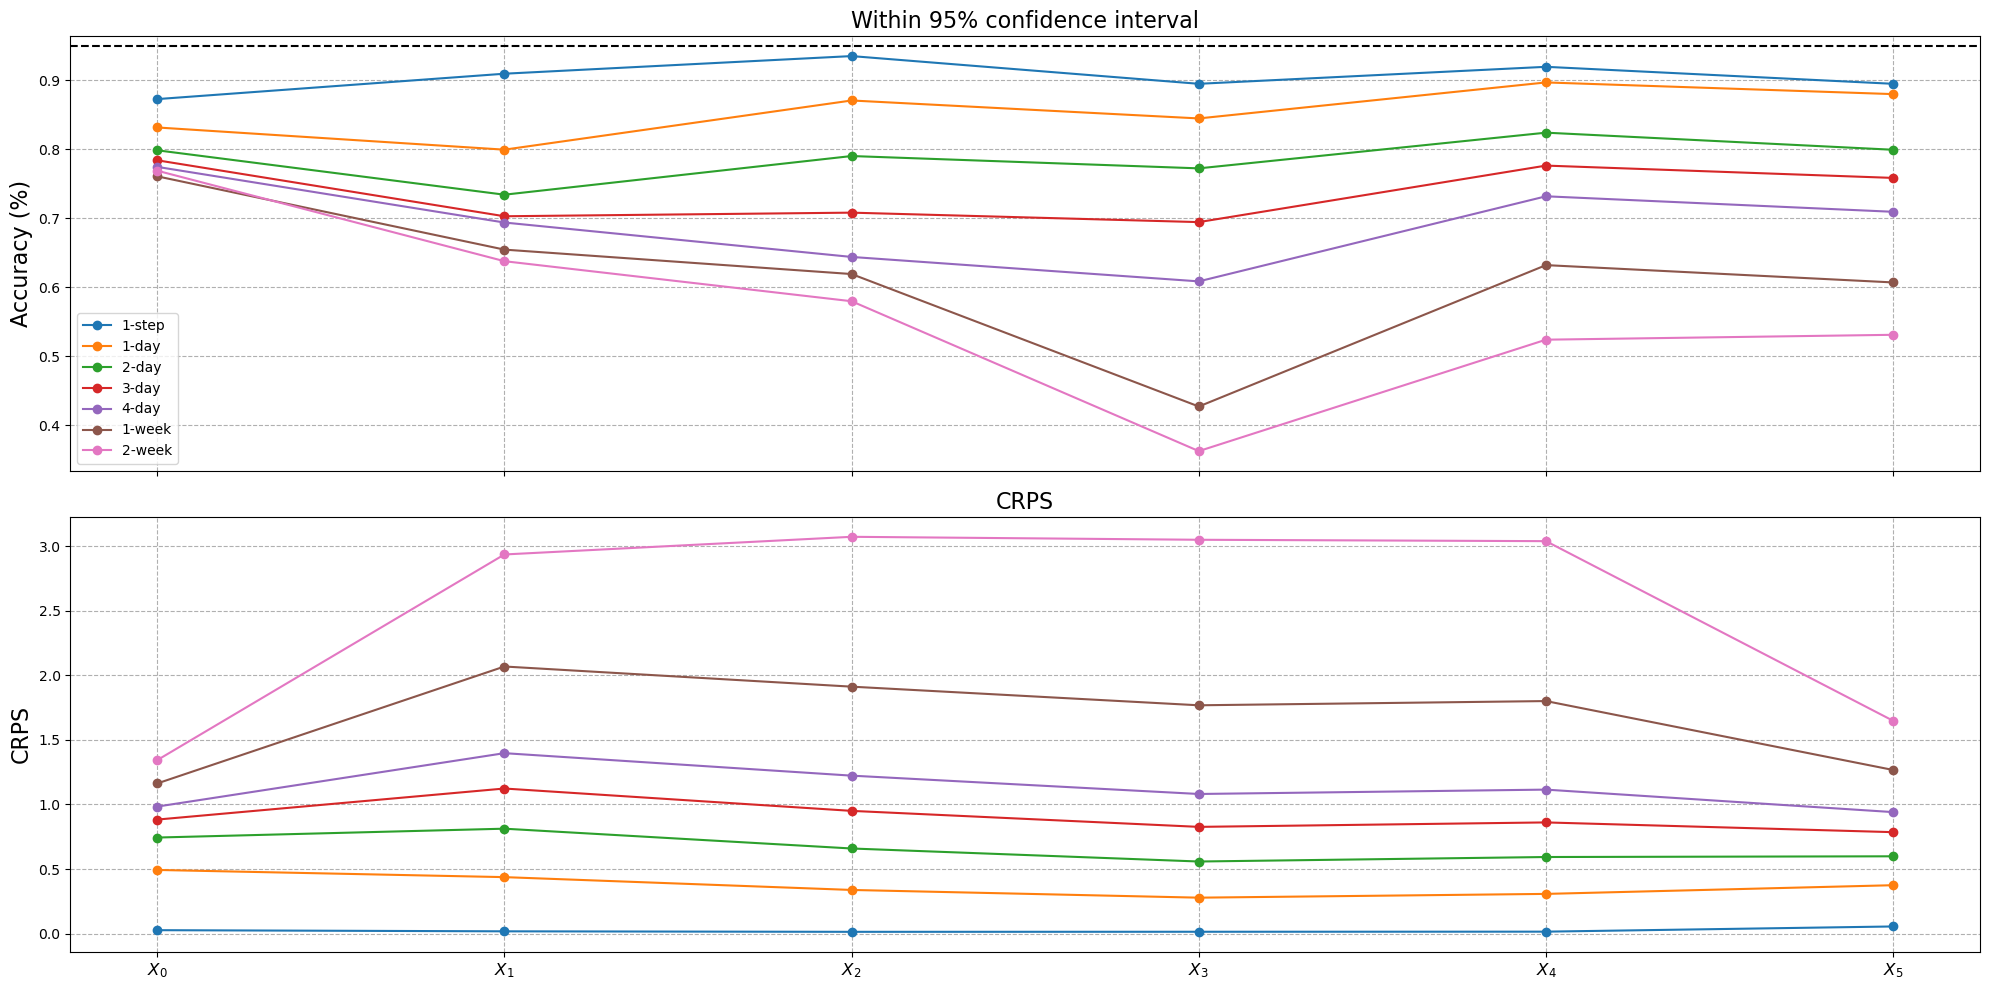

In [71]:
from scipy.stats import norm
def crps_norm(x, mu, sigma):
    sx = (x-mu)/sigma
    return sigma * (sx*(2*norm.cdf(sx)-1) + 2 * norm.pdf(sx) - 1/np.sqrt(np.pi))

def get_acc(p, sd, D):
    p = p.values[1:,:6]
    sd = sd.values[1:,:6]
    D = D.values[:,:6]

    q = 1.96
    # within confidence interval
    within = np.sum((D > p - q * sd) & (D < p + q * sd), axis=0)

    # Continouous Rank Probability Score
    crps = crps_norm(D, p, sd).mean(axis = 0)

    return within / len(D), crps


preds = [p1, p1d, p2d, p3d, p4d, p1w, p2w]
sds = [sd1, sd1d, sd2d, sd3d, sd4d, sd1w, sd2w]
labels = ['1-step', '1-day', '2-day', '3-day', '4-day', '1-week', '2-week']
xlabs = [r'$X_0$', r'$X_1$', r'$X_2$', r'$X_3$', r'$X_4$', r'$X_5$']
fig, ax = plt.subplots(2, 1, figsize=(20, 10), sharex=True)
i = 0
for p, sd in zip(preds, sds):
    acc, crps = get_acc(p, sd, D)
    ax[0].plot(acc, label=labels[i], marker = 'o')
    ax[1].plot(crps, label=labels[i], marker = 'o')

    i+=1
ax[0].legend()
ax[0].grid(linestyle='--')
ax[0].set_title('Within 95% confidence interval', fontsize=16)
ax[0].set_ylabel('Accuracy (%)', fontsize=16)
ax[0].axhline(0.95, color='black', linestyle='--')


ax[1].grid(linestyle='--')
ax[1].set_title('CRPS', fontsize=16)
ax[1].set_ylabel('CRPS', fontsize=16)
ax[1].set_xticks(range(6))
ax[1].set_xticklabels(xlabs, fontsize=12)



fig.tight_layout()

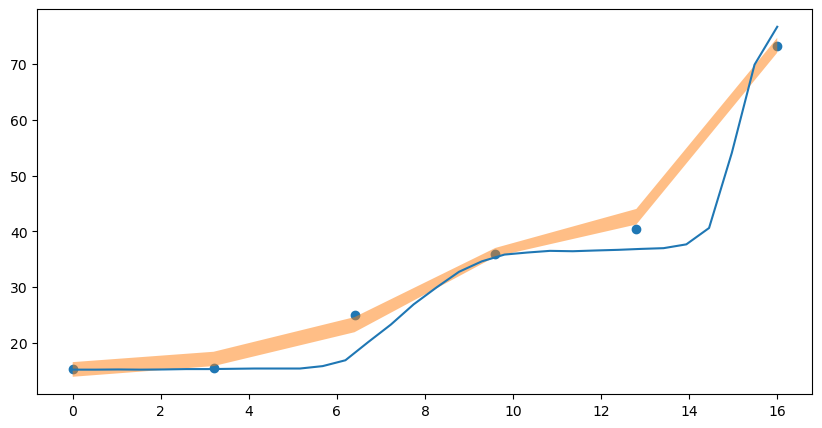

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
idx = 600
x1 = np.linspace(0,16,32)
x2 = np.linspace(0, 16, 6)
ax.plot(x1, water_sensors.iloc[idx])
ax.scatter(x2, D.iloc[idx,0:6])
# ax.scatter(x2, p1.iloc[1,0:6])
# ax.errorbar(x2, p2d.iloc[idx,0:6], yerr=sd2d.iloc[idx,0:6]*10, fmt='o')
q = 1.96
ax.fill_between(x2, p2d.iloc[idx,0:6].values-q*sd2d.iloc[idx,0:6].values , p2d.iloc[idx,0:6].values+q*sd2d.iloc[idx,0:6].values, alpha = 0.5)

AttributeError: module 'numpy.random' has no attribute 'qnormal'

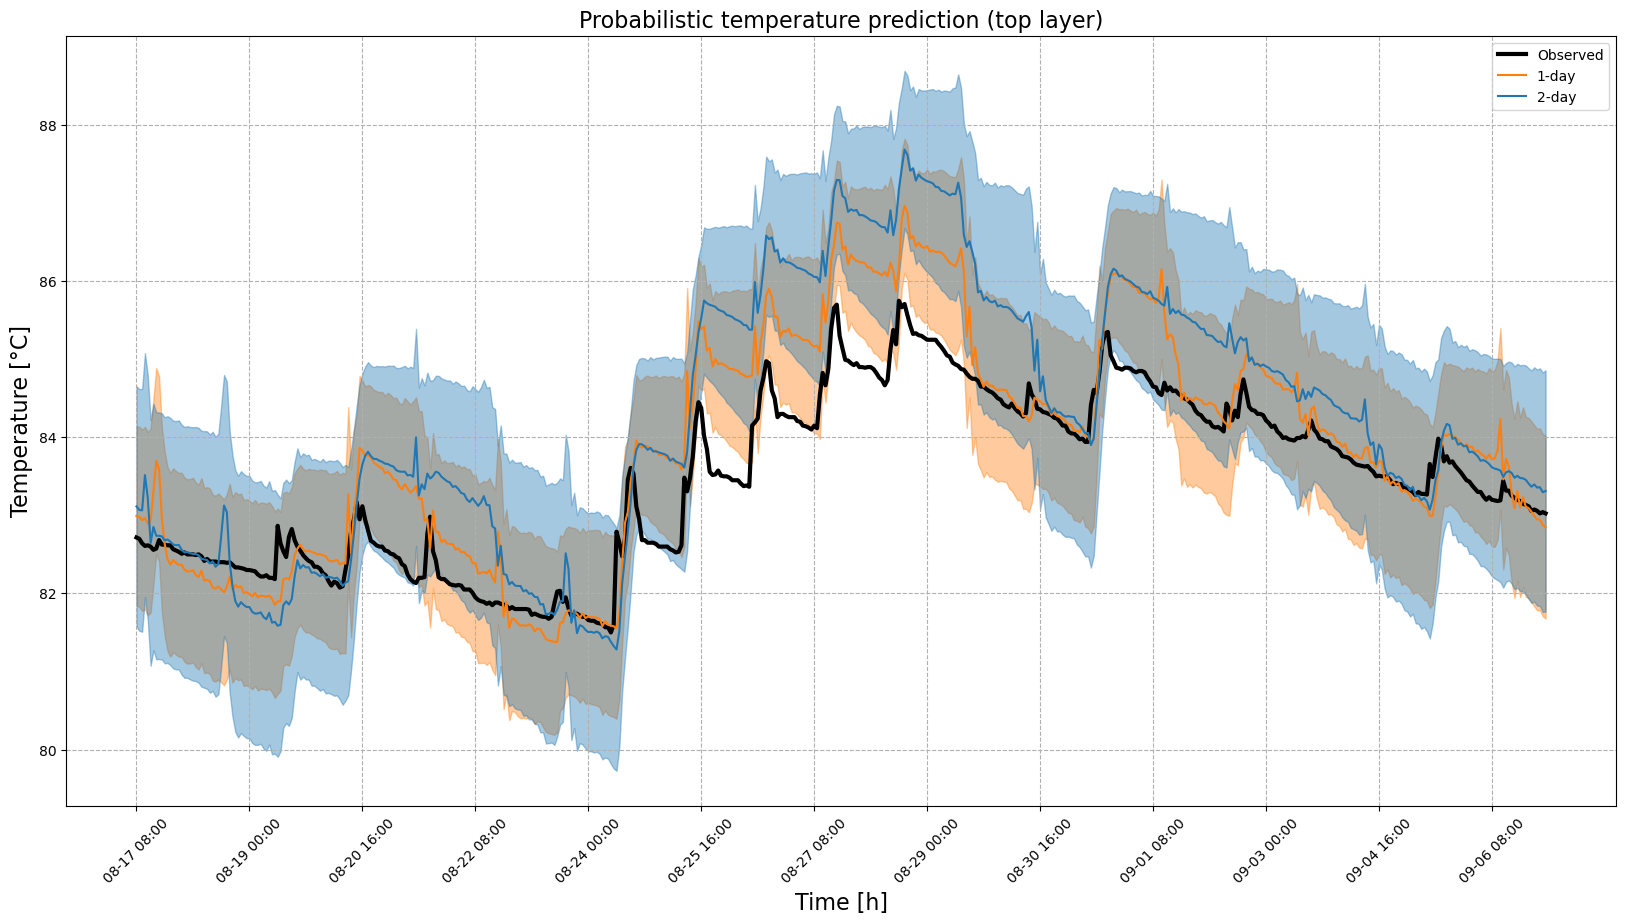

In [156]:
fig, ax = plt.subplots(1,1,figsize = (20,10))
start,stop = 3500,4000
obs = D.X6.values[start:stop]

# pred = p4d.x6.values[start:stop]
# sd = sd4d.X6.values[start:stop]
# x = np.arange(len(pred))
labels = ['1-day', '2-day']
i = 0
ax.plot(obs, color = 'black', linewidth = 3, label = 'Observed', linestyle = '-')
preds = [p1d,p2d]
sds = [sd1d, sd2d]
for p, sd in zip(preds, sds):
    p = p.values[start:stop,:6]
    s = sd.values[start:stop,:6]
    ax.plot(p[:,-1], label=labels[i], c = f'C{(i+1)%2}')
    ax.fill_between(range(len(p)), p[:,-1]-1.96*s[:,-1], p[:,-1]+1.96*s[:,-1], alpha = 0.4, color = f'C{(i+1)%2}')
    i+=1
    # ax[0].fill_between(x, pred-2*sd, pred+2*sd, color = 'C1', alpha = 0.5)
ax.legend()
ax.grid(linestyle = '--')


u = D.Ftop.values[start:stop]
v = D.Fbot.values[start:stop]

idx = D.index[start:stop].strftime('%m-%d %H:%M') 

ax.set_xticks(np.arange(len(idx), step = 40))
ax.set_xticklabels(idx[::40], rotation = 45)

ax.set_xlabel('Time [h]', fontsize = 16)
ax.set_ylabel('Temperature [°C]', fontsize = 16)

ax.set_title('Probabilistic temperature prediction (top layer)', fontsize = 16)
# ax[1].plot(u)


pred_ = pd.read_csv('../predictions/results_simple/p_1d.csv', index_col=0)
sd_ = pd.read_csv('../predictions/results_simple/sd_obs_1d.csv', index_col=0)




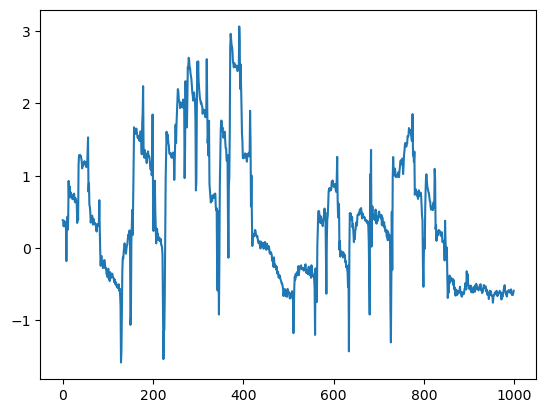

In [6]:
plt.plot((pred-obs)/sd)

# X and Y 
$

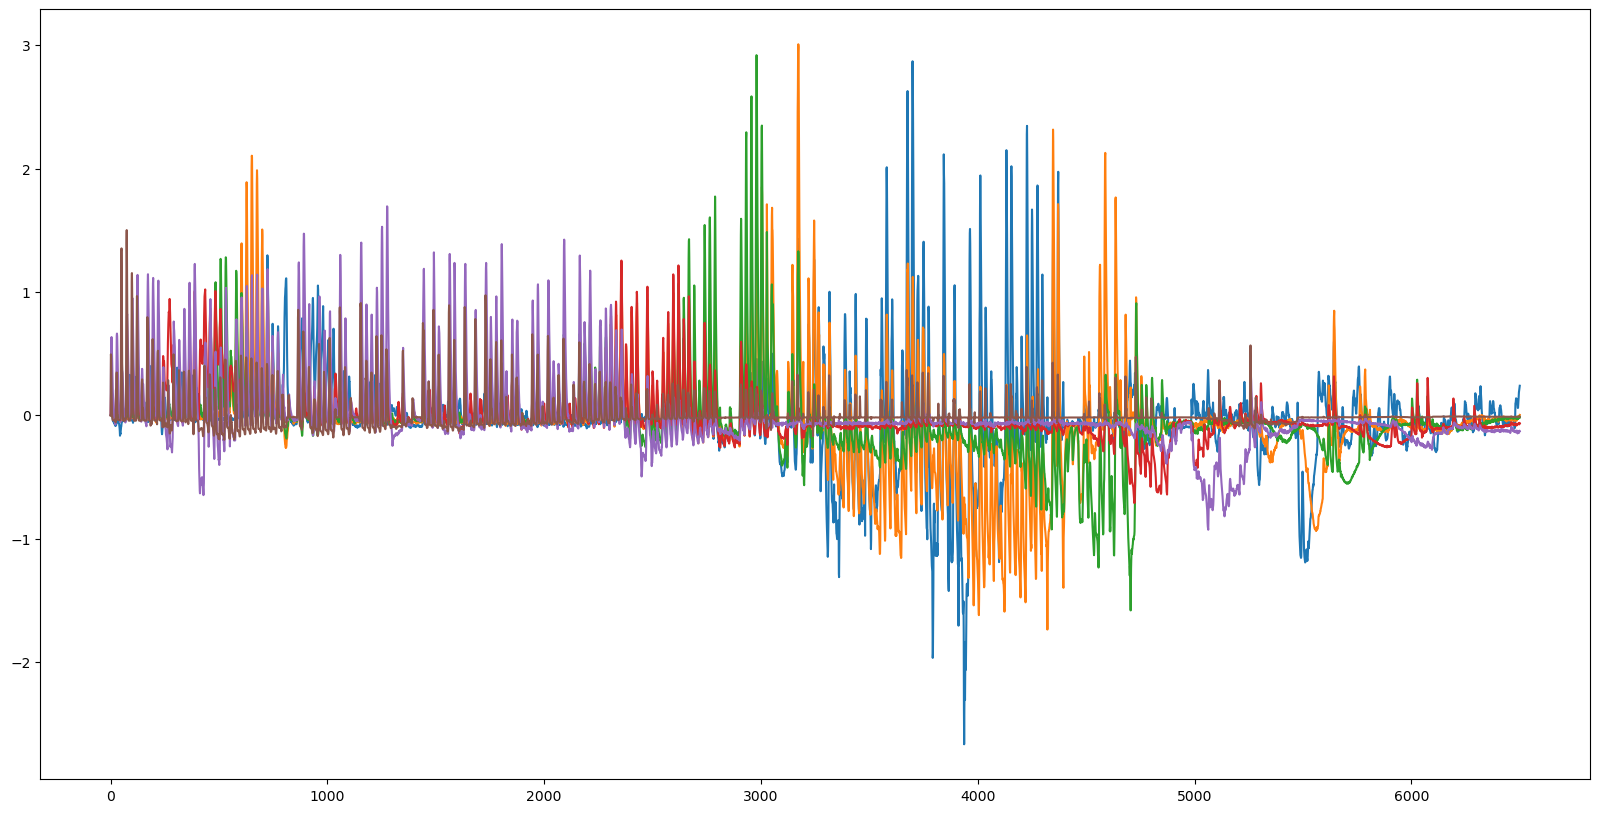

In [7]:
fig, ax = plt.subplots(1,1, figsize = (20,10))
x = np.linspace(0,16,6)
p = p1d.values
sd = sd1d.values
idx = 3000

# ax.scatter(x,p.iloc[idx,0:6].values-p.iloc[idx,6:].values)
diff = p[:,0:6] - p[:,6:]

ax.plot(diff)

array([[0.00290039, 0.00292093, 0.00292094, 0.002872  , 0.00292095,
        0.00197059],
       [0.91718621, 0.92368237, 0.92368556, 0.90820901, 0.92368805,
        0.62319509],
       [1.19754843, 1.21327266, 1.21329785, 1.17527149, 1.2133172 ,
        0.66844749],
       ...,
       [1.79763879, 1.87729869, 1.88116171, 1.6564622 , 1.88676228,
        0.89841097],
       [1.79763834, 1.87729845, 1.88116155, 1.65646216, 1.88676011,
        0.89840478],
       [1.79763761, 1.87729807, 1.8811613 , 1.6564621 , 1.88675775,
        0.89839525]])

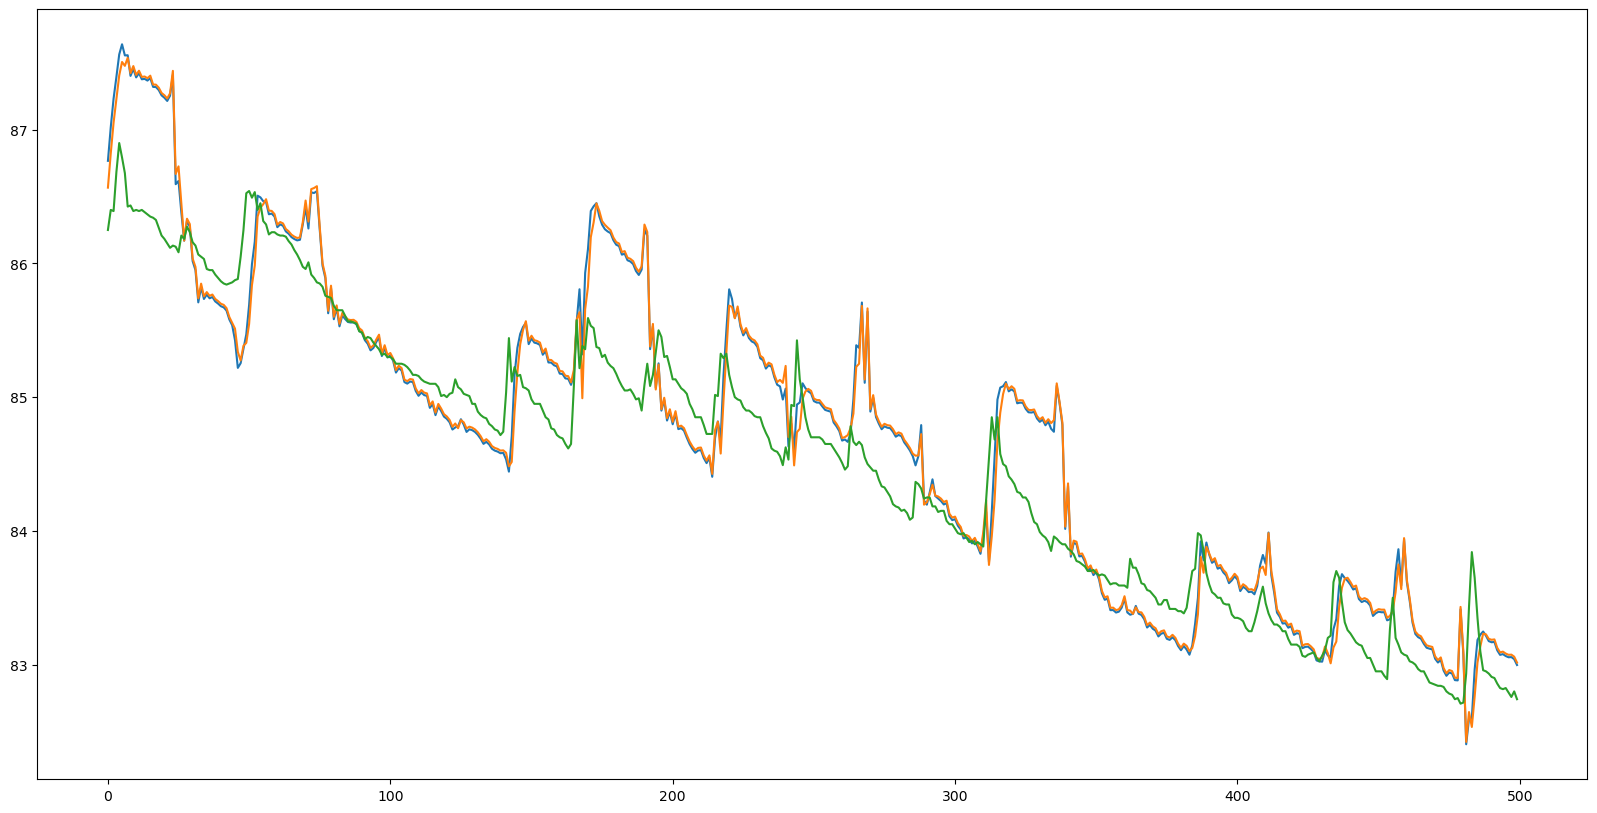

In [8]:
p = p1d
sd = sd1d_state
obs = D.values[:,0:6]
x = p.values[:,0:6]
y = p.values[:,6:]
sdx = sd.values[:,0:6]
sdy = sd.values[:,6:]

fig, ax = plt.subplots(1,1,figsize=(20,10))

ax.plot(x[3000:3500,5])
ax.plot(y[3000:3500,5])
ax.plot(obs[3000:3500,5])
sdy

# ENERGY CONTENT

In [142]:
from scipy.optimize import minimize
from tqdm import tqdm
from scipy.interpolate import interp1d

# Volumes
a = 90.4 # side length of top surface
layer_height = 0.5 # water layer height

volume_per_layer = []
top_area_per_layer = []
for _ in range(1, 33):
    b = a - 2 # the slope is 1:2 thus giving 1 m length at each side
    layer_volume = layer_height / 3 *(a**2 + a*b + b**2)
    volume_per_layer.append(layer_volume)
    top_area_per_layer.append(a**2)
    a = b

top_area_per_layer.append(b**2)

# volume_per_layer = pd.Series(volume_per_layer)
volume_per_layer = volume_per_layer[::-1]
# top_area_per_layer = pd.Series(top_area_per_layer)
top_area_per_layer = top_area_per_layer[::-1]

x = np.linspace(0, 16, 33)
d = interp1d(x, np.cumsum([0] + volume_per_layer), kind='quadratic')
x = np.linspace(0, 16, 33)
a = interp1d(x, top_area_per_layer, kind='quadratic')

def getVolandCentroid(z, dz):
    a_bot = a(z)
    a_top = a(z+dz)
    volume = d(z+dz) - d(z)
    a_, b_ = np.sqrt(a_top), np.sqrt(a_bot)
    centroid = dz - dz * (a_top+2*a_*b_+3*a_bot) / (2*(2*a_top+2*a_*b_+2*a_bot))

    return volume, centroid + z


z = np.arange(0, 16, 0.5 )
dz = 0.5




# Compute that god damm MIX number!
TMIN, TMAX = 10, 90


def density_water(T):
    '''Density (rho) of water in kg/m^3 based on fluid temperature (T) nearest the flow meter in degrees Celsius'''
    rho = (999.85+5.332*(10**-2)*T-7.564*(10**-3)*(T**2)+4.323*(10**-5)*(T**3)-1.673*(10**-7)*(T**4)+2.447*(10**-10)*(T**5))
    return(rho)

def specific_heat_water(T):
    '''Specific heat (cp) of water in J/(kg K) based on mean fluid temperature (T) in degrees Celsius'''
    cp = (4.2184-2.8218*(10**-3)*T+7.3478*(10**-5)*(T**2)-9.4712*(10**-7)*(T**3)+7.2869*(10**-9)*(T**4)-2.8098*(10**-11)*(T**5)
          +4.4008*(10**-14)*(T**6))*1000
    return(cp)

def mass(T, V):
    ''' Returns the mass profile of the storage given temperatures T and volumes V'''
    return density_water(T)*V

def energy(T, V):
    ''' Returns the energy profile of the storage given temperatures T and volumes V'''
    return mass(T, V)*specific_heat_water(T)*(T-TMIN)

def energy_content(y, v):
    ''' Returns the energy content of the storage given temperatures y and volumes v'''
    if (type(y) == pd.DataFrame) or (type(y) == pd.Series):

        y = y.values
        if y.ndim == 1:
            y = y.reshape(1, -1)
        E = energy(y, v)
        return E.sum(axis =1)
    else:
        E = energy(y, v)
        return E.sum()

    
def energy_moment(y, v, c):
    ''' Returns the energy moment of the storage given temperatures y, volumes v and centroids c'''
    if (type(y) == pd.DataFrame) or (type(y) == pd.Series):
        y = y.values
        if y.ndim == 1:
            y = y.reshape(1, -1)
        
        E = energy(y, v)
        return (E * c).sum(axis =1)
    else:
        E = energy(y, v)
        return (E * c)

def energy_moment_mixed(y, v, c):
    M = mass(y, v)
    T_avg2 = (M * y).sum(axis=1) / M.sum(axis=1)
    T_avg2 = pd.DataFrame(np.ones_like(y) * T_avg2.values.reshape(-1,1))
    Me_mix = energy_moment(T_avg2, v, c)
    E_mix = energy_content(T_avg2, v)
    return Me_mix, E_mix

def stratification_coefficient(y, v, c):
    m = mass(y, v)
    M = m.sum(axis=1)
    T_avg = y.mean(axis=1)
    strat = (m * (y-y.mean(axis = 1).values.reshape(-1,1))**2).sum(axis=1) / M
    return strat.values.reshape(-1)

def energy_moment_stratified(y, v, c):

    def objective(z, E_exp):
        dz = 16 - z
        v, c = getVolandCentroid(z, dz)
        E_str = energy_content(TMAX, v)

        return pow((E_exp) - (E_str),2)
    
    E_exp = energy_content(y, v)
    Z = []
    V = []
    Me_str = []
    E_str = []
    x0 = 20
    for idx in tqdm(range(len(E_exp))):
        res = minimize(objective, x0, args=(E_exp[idx]), bounds=[(1, 15)])
        x0 = res.x
        v, c = getVolandCentroid(x0, 16-x0)
        e = energy_moment(TMAX, v, c)
        Me_str.append(e)
        E_str.append(energy_content(TMAX, v))
        Z.append(x0)
        V.append(v)
    Me_str = np.array(Me_str).reshape(-1)
    Z = np.array(Z).reshape(-1)
    V = np.array(V).reshape(-1)
    return Me_str, E_str, Z, V

y = water_sensors
z = np.arange(0, 16, 0.5)
dz = 0.5

v, c = getVolandCentroid(z, dz)
N = len(z)
E_true = energy_content(y, v)

Me_true = energy_moment(y, v, c)
Me_Mix_true, E_mix = energy_moment_mixed(y, v, c)
Me_str_true, E_str_true, Z, V = energy_moment_stratified(y, v, c)

Str_true = stratification_coefficient(y, v, c)

100%|██████████| 6500/6500 [00:18<00:00, 360.59it/s]


In [143]:
MIX_true = (Me_str_true - Me_true)/(Me_str_true - Me_Mix_true)


In [163]:
x1 = np.linspace(0, 16, 16)
z = np.arange(0, 16, 0.5)
dz = 0.5

x1= np.array([1,3.5,7.5,10.5,13.5,16])
# f = interp1d(x2, p1d.iloc[idx], kind='linear', fill_value='extrapolate')

def getMetrics(pred):
    newdata = pred.apply(lambda x: interp1d(x1, x, kind='slinear', fill_value='extrapolate')(z), axis=1)
    newdata = newdata.values
    newdata = np.vstack(newdata)
    newdata = pd.DataFrame(newdata, index=pred.index, columns=z)
    y = newdata

    v, c = getVolandCentroid(z, dz)
    N = len(z)
    E = energy_content(y, v)


    E = energy_content(y, v)
    # Me = energy_moment(y, v, c)
    # Me_Mix,_  = energy_moment_mixed(y, v, c)
    # Me_str, _, Z, V = energy_moment_stratified(y, v, c)
    # S = stratification_coefficient(y, v, c)
    
    return E

q = 1.96
p1d_min = p2w.iloc[:,0:6] - sd2w.values * q
p1d_max = p2w.iloc[:,0:6] + sd2w.values * q




In [180]:
EMAX = 3600000000*5412


preds = [p1d, p2d, p3d, p4d, p1w, p2w]
sds = [sd1d, sd2d, sd3d, sd4d, sd1w, sd2w]
labels = ['1-day', '2-day', '3-day', '4-day', '1-week', '2-week']
q = 1.96
E, E_min, E_max = [], [], []
for p, s in zip(preds, sds):
    p = p.values[:,:6]
    s = s.values[:,:6]
    pmin, pmax = p - s*q, p + s*q

    E.append(getMetrics(pd.DataFrame(p))[1:])
    E_min.append(getMetrics(pd.DataFrame(pmin))[1:])
    E_max.append(getMetrics(pd.DataFrame(pmax))[1:])





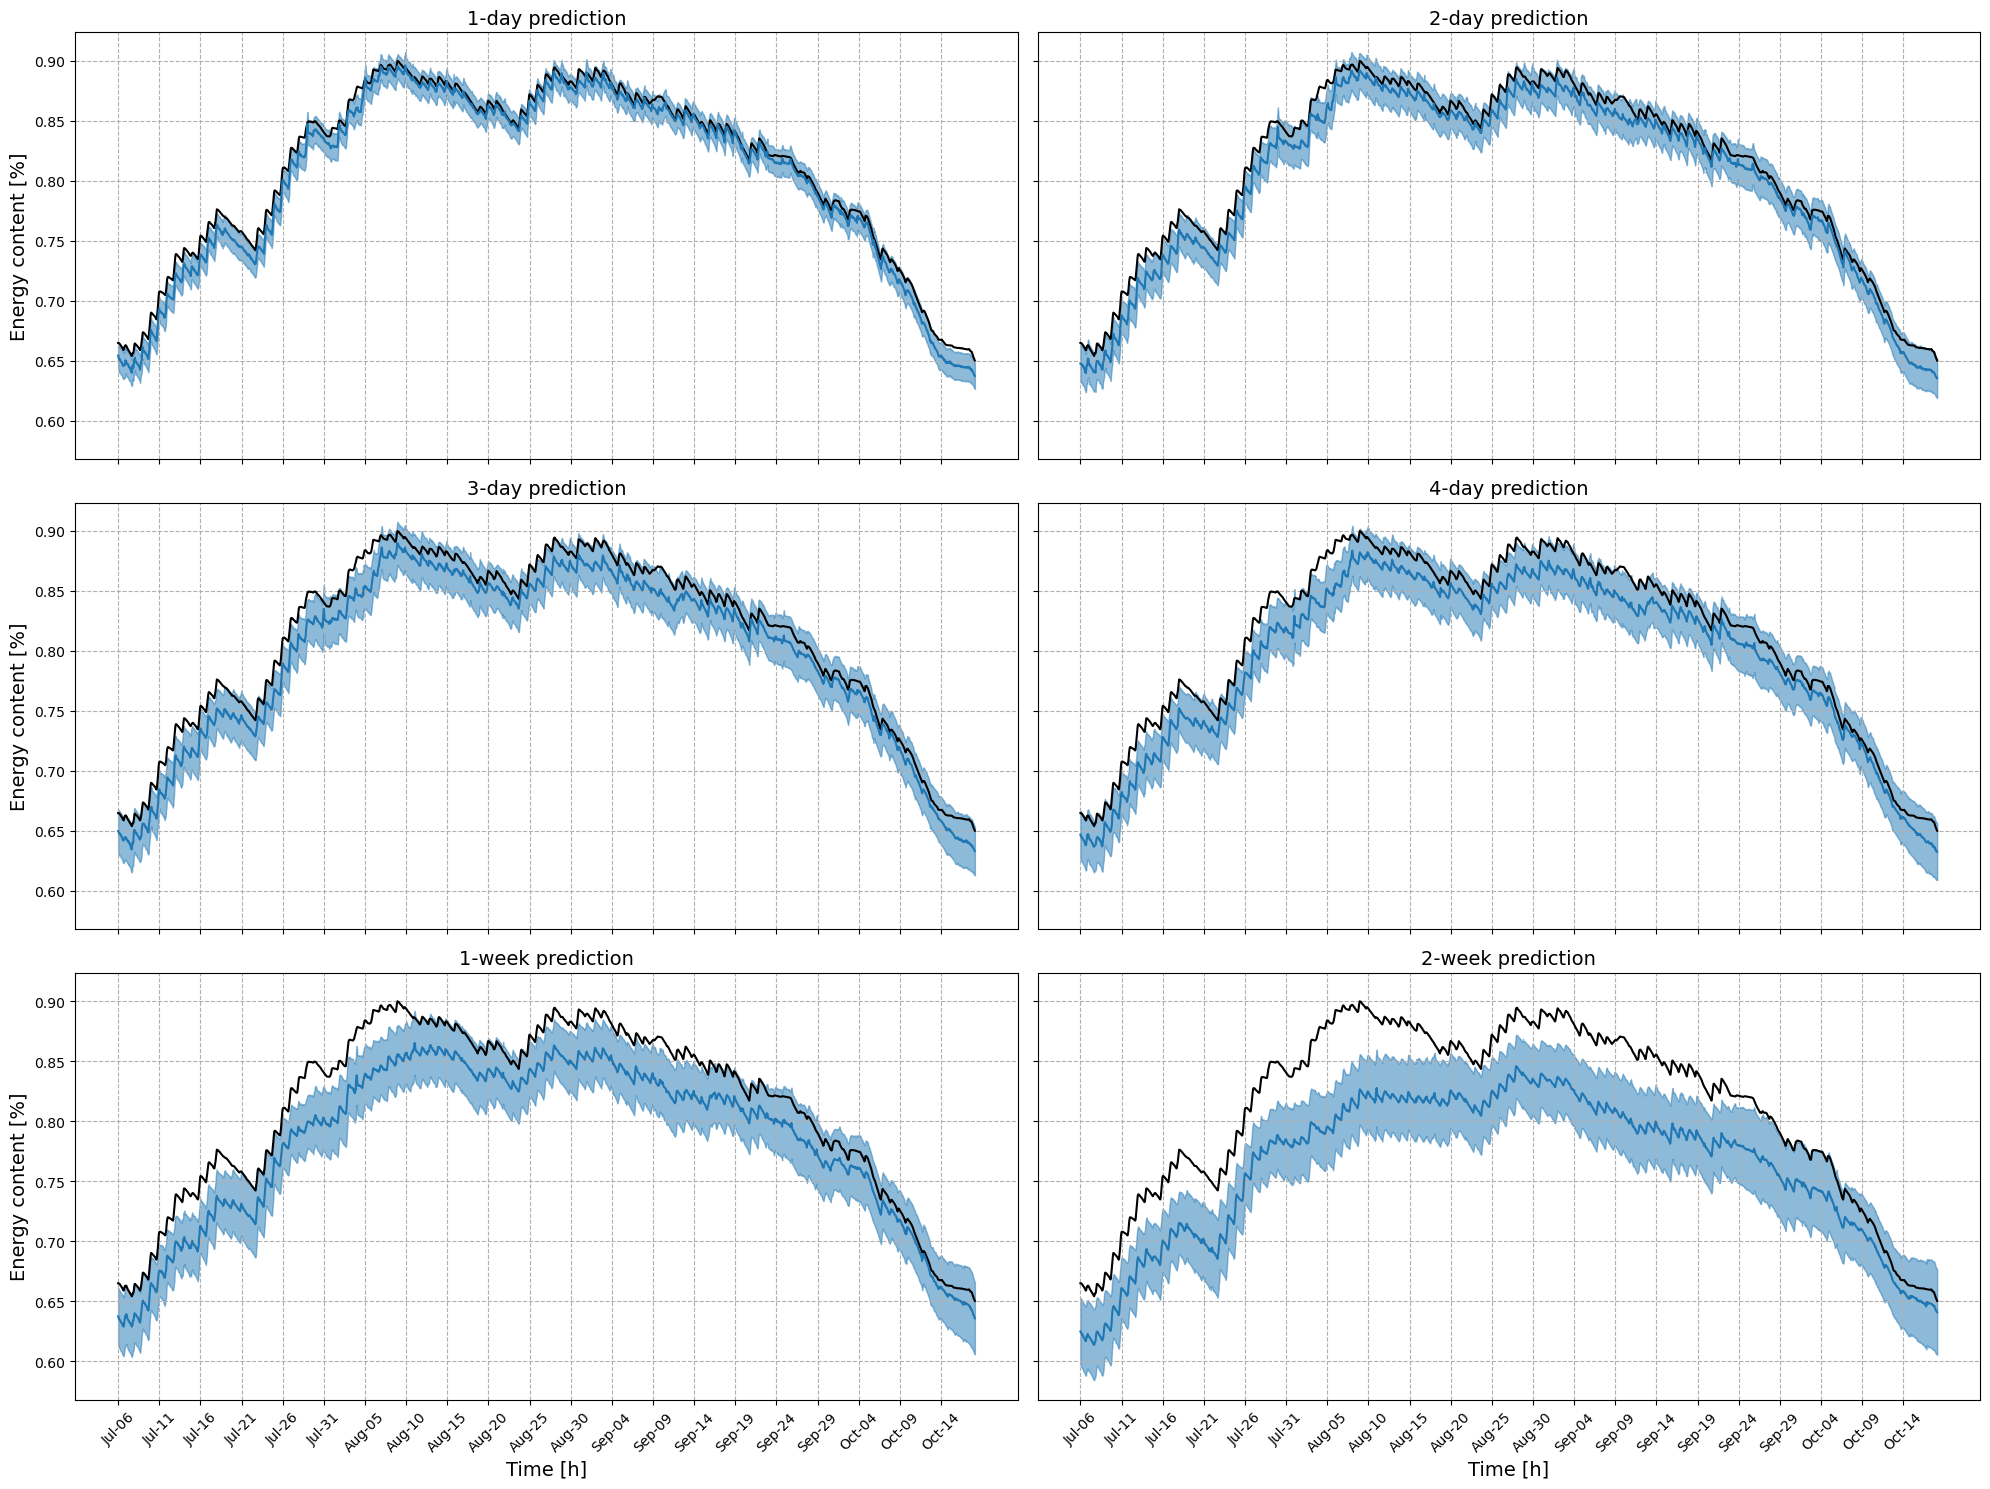

In [203]:
start, stop = 2500, 5000
fig, ax = plt.subplots(3,2, figsize = (20,15), sharex = True, sharey = True)

for i in range(6):
    ax[i//2, i%2].plot(E_true[start:stop] / EMAX, label = 'Prediction', c = 'black')

    ax[i//2, i%2].plot(E[i][start:stop] / EMAX, label = 'Mean prediction', c = 'C0')
    ax[i//2, i%2].fill_between(range(len(E_true[start:stop])), E_min[i][start:stop] / EMAX, E_max[i][start:stop] / EMAX, alpha = 0.5, label = '95% CI', color = 'C0')

    ax[i//2, i%2].grid(linestyle = '--')

ax[0,0].set_title('1-day prediction', fontsize = 14)
ax[0,1].set_title('2-day prediction', fontsize = 14)
ax[1,0].set_title('3-day prediction', fontsize = 14)
ax[1,1].set_title('4-day prediction', fontsize = 14)
ax[2,0].set_title('1-week prediction', fontsize = 14)
ax[2,1].set_title('2-week prediction', fontsize = 14)

idx = D.index[start:stop].strftime('%b-%d')
ax[2,0].set_xticks(np.arange(len(idx), step = 120))
ax[2,0].set_xticklabels(idx[::120], rotation = 45)
ax[2,1].set_xticks(np.arange(len(idx), step = 120))
ax[2,1].set_xticklabels(idx[::120], rotation = 45)

ax[2,0].set_xlabel('Time [h]', fontsize = 14)
ax[2,1].set_xlabel('Time [h]', fontsize = 14)

ax[0,0].set_ylabel('Energy content [%]', fontsize = 14)
ax[1,0].set_ylabel('Energy content [%]', fontsize = 14)
ax[2,0].set_ylabel('Energy content [%]', fontsize = 14)



fig.tight_layout()